In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import random
np.random.seed(123)
random.seed(123)

### 데이터 구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

In [3]:
train_df = pd.read_csv('Training.csv')
test_df = pd.read_csv('Testing.csv')

train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
train_df.describe()
#임신횟수를 제외한 다른 변수들의 최소값이 0인 경우, 이를 결측값으로 봄

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


(array([ 17.,   0.,  12.,  84., 399., 760., 464., 375., 172., 177.]),
 array([  0. ,  19.7,  39.4,  59.1,  78.8,  98.5, 118.2, 137.9, 157.6,
        177.3, 197. ]),
 <BarContainer object of 10 artists>)

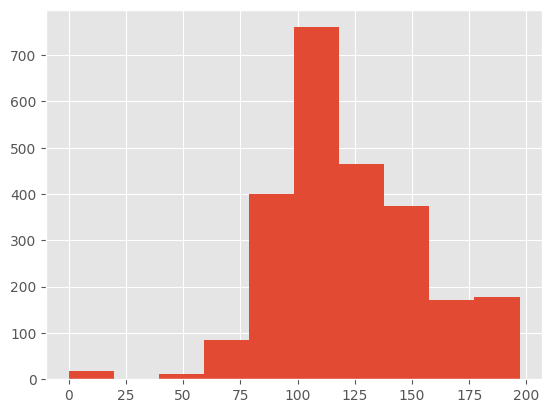

In [6]:
plt.hist(train_df['Glucose'], bins=10) #0값을 결측치 처리

(array([114.,   0.,   8.,  36., 289., 959., 734., 271.,  39.,  10.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

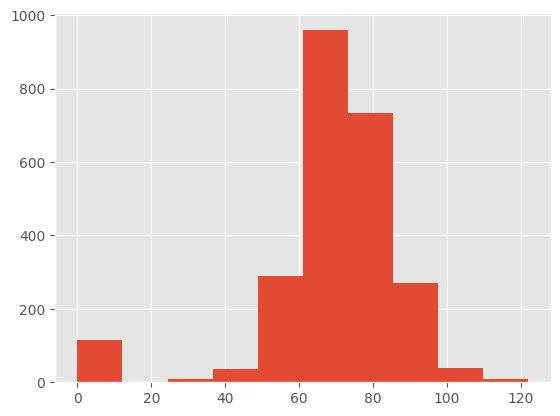

In [7]:
plt.hist(train_df['BloodPressure'], bins=10) #0값을 결측치 처리

(array([717.,  71., 250., 329., 363., 364., 267.,  64.,  27.,   8.]),
 array([ 0. ,  6.3, 12.6, 18.9, 25.2, 31.5, 37.8, 44.1, 50.4, 56.7, 63. ]),
 <BarContainer object of 10 artists>)

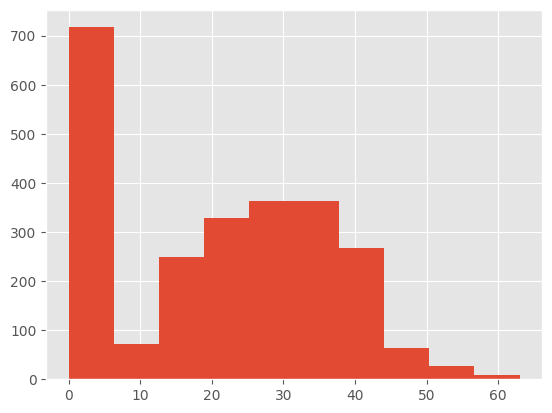

In [8]:
plt.hist(train_df['SkinThickness'], bins=10) #0값을 결측치 처리

(array([1589.,  453.,  226.,  109.,   29.,   25.,   15.,    0.,   12.,
           2.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

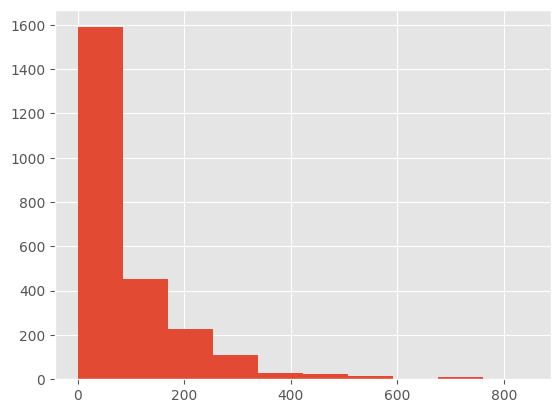

In [9]:
plt.hist(train_df['Insulin'], bins=10) #당뇨병 환자의 경우, 스스로 인슐린 생성을 하지 못해 0이 나오는 경우가 있음

### 인슐린 정도가 10 이하인 경우, 당뇨병 진단 결과
- outcome이 0인 경우만 결측치 처리를 해야겠다

688 493


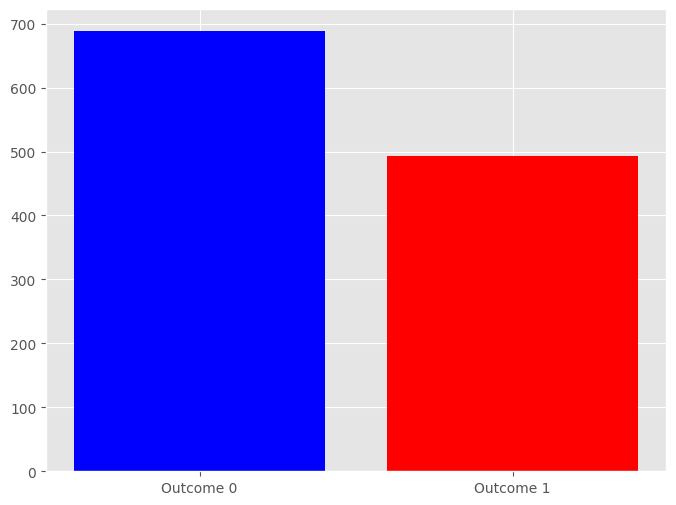

In [10]:
insul10 = train_df[train_df['Insulin']<= 10]
outcome0 = insul10[insul10['Outcome']==0]
outcome1 = insul10[insul10['Outcome']==1]
print(len(outcome0), len(outcome1))

plt.figure(figsize=(8, 6))
plt.bar(['Outcome 0', 'Outcome 1'], [len(outcome0), len(outcome1)], color=['blue', 'red'])
plt.show()

(array([ 31.,   0.,  49., 522., 827., 730., 246.,  45.,   7.,   3.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

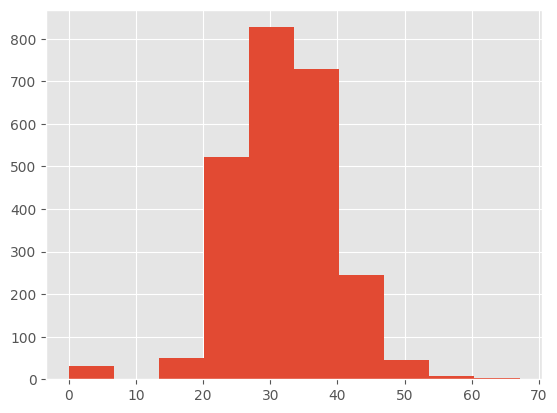

In [11]:
plt.hist(train_df['BMI'], bins=10) #0값을 결측치 처리

(array([974., 686., 442., 180.,  75.,  51.,   4.,  24.,   4.,  20.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

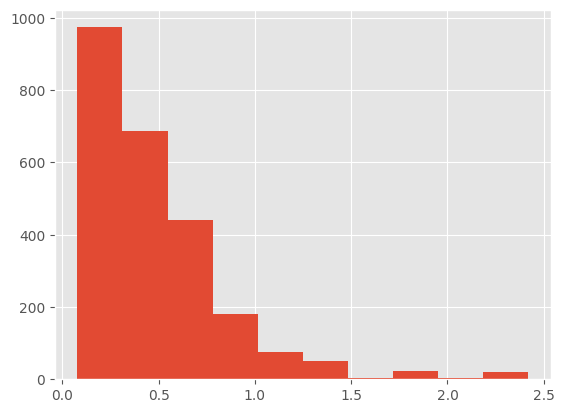

In [12]:
plt.hist(train_df['DiabetesPedigreeFunction'], bins=10) #0부터 시작하는 값으로, 높을 수록 가족 중 당뇨병 발생 위험이 더 높음을 의미.

### 상관 행렬

In [13]:
train_corr = train_df.corr()
train_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.185535,0.110625,-0.029415,-0.030863,0.094674,-0.053568,0.541545,0.218263
Glucose,0.185535,1.000000,0.116223,0.058602,0.351118,0.252411,0.167317,0.270796,0.440045
BloodPressure,0.110625,0.116223,1.000000,0.205257,0.102433,0.245112,0.007001,0.202828,0.069604
SkinThickness,-0.029415,0.058602,0.205257,1.000000,0.478468,0.376467,0.173692,-0.130043,0.071114
Insulin,-0.030863,0.351118,0.102433,0.478468,1.000000,0.204730,0.228555,-0.017574,0.109022
BMI,0.094674,0.252411,0.245112,0.376467,0.204730,1.000000,0.123726,0.067208,0.308345
DiabetesPedigreeFunction,-0.053568,0.167317,0.007001,0.173692,0.228555,0.123726,1.000000,0.041072,0.160543
Age,0.541545,0.270796,0.202828,-0.130043,-0.017574,0.067208,0.041072,1.000000,0.217349
Outcome,0.218263,0.440045,0.069604,0.071114,0.109022,0.308345,0.160543,0.217349,1.000000


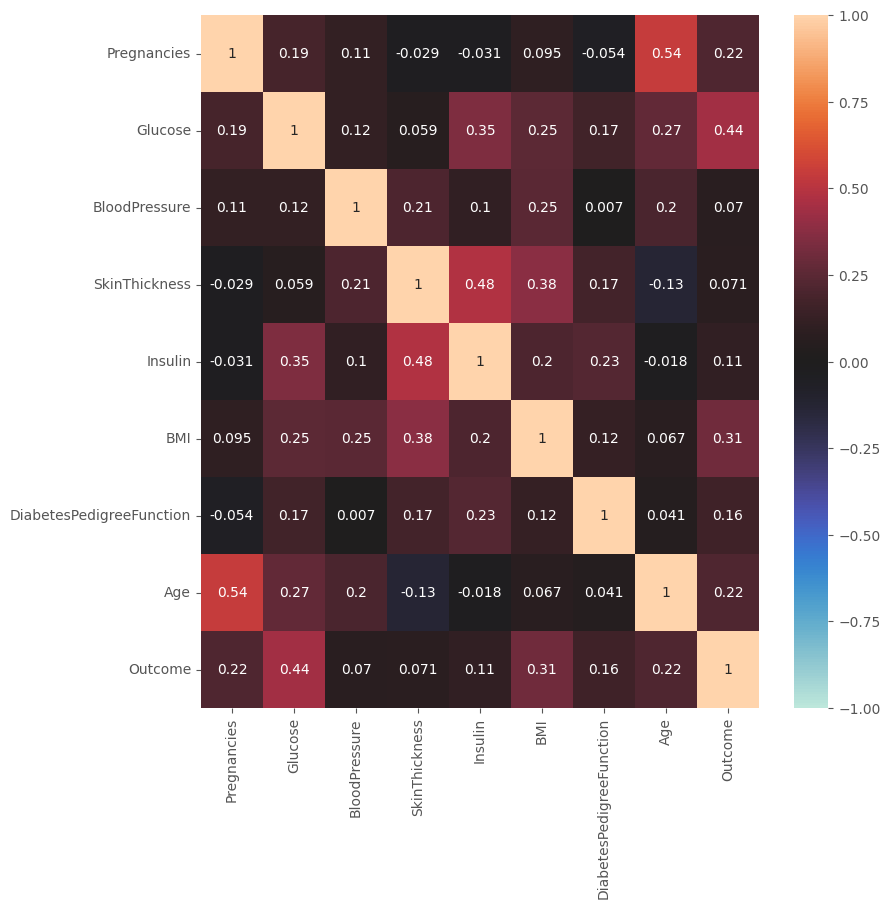

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmin=-1, vmax=1, center=0, annot=True)
plt.show()

### 전처리

In [15]:
df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,10,101,76,48,180,32.9,0.171,63,0
2764,2,122,70,27,0,36.8,0.340,27,0
2765,5,121,72,23,112,26.2,0.245,30,0
2766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
df.isnull().sum() #test 셋의 데이터에도 이미 outcome이 적혀있는 상황

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
test_df.drop(columns=['Outcome'], inplace=True)

In [19]:
df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)

In [20]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     308
dtype: int64

### 결측치 처리가 필요한 변수
- Glucose: 0값을 평균으로 대체
- BooldPressure: 0값을 평균으로 대체
- SkinThickness: 0값을 평균으로 대체
- Insulin: outcome이 0인 경우만 평균으로 대체
- BMI: 0값을 결측치 처리

In [21]:
df['Glucose']=df['Glucose'].replace(0,np.NaN)
df['BloodPressure']=df['BloodPressure'].replace(0,np.NaN)
df['SkinThickness']=df['SkinThickness'].replace(0,np.NaN)
df['BMI']=df['BMI'].replace(0,np.NaN)

In [22]:
test = (df['Insulin'] >= 0) & (df['Insulin'] <= 10) & (df['Outcome'] == 0)
df.loc[test, 'Insulin'] = pd.NA

In [23]:
df.isnull().sum()

Pregnancies                   0
Glucose                      18
BloodPressure               128
SkinThickness               810
Insulin                     688
BMI                          35
DiabetesPedigreeFunction      0
Age                           0
Outcome                     308
dtype: int64

In [24]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())
df['BMI']=df['BMI'].fillna(df['Insulin'].mean())

df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     308
dtype: int64

### 학습데이터와 테스트 데이터로 분할

In [31]:
train_x = df[~df['Outcome'].isnull()].drop('Outcome', axis = 1).reset_index(drop = True)
train_y = train_df['Outcome']

test_x = df[df['Outcome'].isnull()].drop('Outcome', axis = 1).reset_index(drop = True)

### LightGBM

In [32]:
import lightgbm as lgb

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2)

In [35]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference = lgb_train)

In [36]:
lgb_params = {
    "objective" : "binary",
    "random_seed" : 123
}

In [37]:
model_lgb = lgb.train(lgb_params,
                     lgb_train,
                     valid_sets = lgb_eval,
                     num_boost_round = 100,
                     early_stopping_rounds = 20,
                     verbose_eval = 10)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.247892
[20]	valid_0's binary_logloss: 0.12525
[30]	valid_0's binary_logloss: 0.0736215
[40]	valid_0's binary_logloss: 0.0481161
[50]	valid_0's binary_logloss: 0.0325115
[60]	valid_0's binary_logloss: 0.0265119
[70]	valid_0's binary_logloss: 0.0240815
[80]	valid_0's binary_logloss: 0.0241107
[90]	valid_0's binary_logloss: 0.023228
[100]	valid_0's binary_logloss: 0.0233413
Did not meet early stopping. Best iteration is:
[96]	valid_0's binary_logloss: 0.0227587


In [38]:
model_lgb.feature_importance()

array([201, 420, 258, 235, 622, 379, 452, 313])

<Axes: >

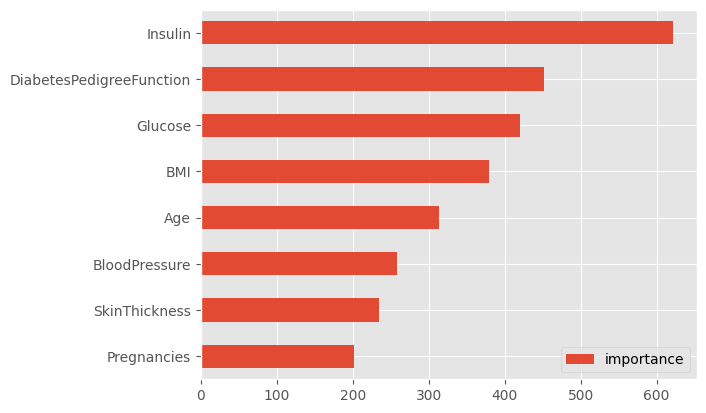

In [39]:
importance = pd.DataFrame(model_lgb.feature_importance(), index =x_train.columns,
                         columns = ['importance']).sort_values(by = "importance", ascending = True)
importance.plot.barh()

In [40]:
y_pred = model_lgb.predict(x_valid, num_iteration = model_lgb.best_iteration)

### 정확도 출력

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_valid, np.round(y_pred))

0.9959349593495935

### 교차검증

In [43]:
folds = 3
kf = KFold(n_splits = folds)

In [44]:
models = []
for train_index, val_index in kf.split(train_x):
    x_train = train_x.iloc[train_index]
    x_valid = train_x.iloc[val_index]
    y_train = train_y.iloc[train_index]
    y_valid = train_y.iloc[val_index]
    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference = lgb_train)
    model_lgb = lgb.train(lgb_params,
                     lgb_train,
                     valid_sets = lgb_eval,
                     num_boost_round = 100,
                     early_stopping_rounds = 20,
                     verbose_eval = 10)
    y_pred = model_lgb.predict(x_valid, num_iteration = model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))
    models.append(model_lgb)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.270396
[20]	valid_0's binary_logloss: 0.149008
[30]	valid_0's binary_logloss: 0.0880567
[40]	valid_0's binary_logloss: 0.0537629
[50]	valid_0's binary_logloss: 0.0359597
[60]	valid_0's binary_logloss: 0.0263912
[70]	valid_0's binary_logloss: 0.0223885
[80]	valid_0's binary_logloss: 0.01949
[90]	valid_0's binary_logloss: 0.0185059
[100]	valid_0's binary_logloss: 0.018375
Did not meet early stopping. Best iteration is:
[95]	valid_0's binary_logloss: 0.0180758
0.9939024390243902
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.264103
[20]	valid_0's binary_logloss: 0.128665
[30]	valid_0's binary_logloss: 0.0684921
[40]	valid_0's binary_logloss: 0.0361431
[50]	valid_0's binary_logloss: 0.0194638
[60]	valid_0's binary_logloss: 0.0104288
[70]	valid_0's binary_logloss: 0.0056945
[80]	valid_0's binary_logloss: 0.0030321
[90]	valid_0's binary_logloss: 0.00162

In [45]:
preds = []

for model in models:
    pred = model.predict(test_x)
    preds.append(pred)

In [46]:
preds_array =  np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

In [47]:
preds_int = (preds_mean > 0.5).astype(int)

In [48]:
test_df['Preds_Int'] = (preds_mean > 0.5).astype(int)

In [49]:
test_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Preds_Int
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,1
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,1
4,10,115,98,0,0,24.0,1.022,34,1
...,...,...,...,...,...,...,...,...,...
303,10,101,76,48,180,32.9,0.171,63,1
304,2,122,70,27,0,36.8,0.340,27,1
305,5,121,72,23,112,26.2,0.245,30,0
306,1,126,60,0,0,30.1,0.349,47,1
